In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

file1 = "affordability.csv"
file2 = 'Affordability_Income_2018Q4.csv'
file3 = "Sale_Prices_Msa.csv"



In [2]:
#Function to convert to yearly
def convert_to_yearly (df):
    converted = (df.groupby(pd.PeriodIndex(df.columns, freq='Y'), axis=1)
                  .mean()
                  .rename(columns=lambda c: str(c).lower()))
    return converted


In [3]:
#Cleaning Data

In [4]:
afford_df = pd.read_csv(file1, encoding="ISO-8859-1")
afford_df.head()


,RegionID,RegionName,SizeRank,Index,HistoricAverage_1985thru1999,1979-03,1979-06,1979-09,1979-12,1980-03,...,2016-12,2017-03,2017-06,2017-09,2017-12,2018-03,2018-06,2018-09,2018-12,2019-03
0,102001,United States,0,Price To Income,2.763961,2.903439,2.939274,2.941948,2.946569,2.934412,...,3.322458,3.333000,3.357272,3.373318,3.381735,3.434020,3.475955,3.509347,3.551774,3.562198
1,394913,"New York, NY",1,Price To Income,3.893124,2.928344,2.956635,2.966927,2.961860,3.007144,...,5.330116,5.327888,5.387242,5.405203,5.416009,5.465964,5.485629,5.482092,5.515186,5.530238
2,753899,"Los Angeles-Long Beach-Anaheim, CA",2,Price To Income,4.471735,4.019673,4.141217,4.208146,4.278269,4.308551,...,8.686866,8.669735,8.653635,8.719940,8.785096,8.904177,8.906760,8.917544,8.917269,8.830346
3,394463,"Chicago, IL",3,Price To Income,2.958478,3.035758,3.045651,2.984501,2.973171,2.895068,...,3.047477,3.052308,3.065096,3.072588,3.088122,3.130550,3.134038,3.126196,3.138068,3.145604
4,394514,"Dallas-Fort Worth, TX",4,Price To Income,3.068857,3.887457,4.025835,4.101038,4.130605,4.135414,...,2.999365,3.033888,3.074540,3.112127,3.149799,3.261339,3.318315,3.357463,3.431827,3.475607


In [5]:
afford_reduced = afford_df.drop(["RegionID", "SizeRank", "Index", "HistoricAverage_1985thru1999"], axis=1)
afford_reduced.set_index("RegionName", inplace=True)
afford_reduced.head()


,1979-03,1979-06,1979-09,1979-12,1980-03,1980-06,1980-09,1980-12,1981-03,1981-06,...,2016-12,2017-03,2017-06,2017-09,2017-12,2018-03,2018-06,2018-09,2018-12,2019-03
RegionName,,,,,,,,,,,,,,,,,,,,,
United States,2.903439,2.939274,2.941948,2.946569,2.934412,2.930558,2.964039,2.917216,2.868511,2.875578,...,3.322458,3.333000,3.357272,3.373318,3.381735,3.434020,3.475955,3.509347,3.551774,3.562198
"New York, NY",2.928344,2.956635,2.966927,2.961860,3.007144,2.996565,3.060809,2.980520,3.018619,3.067168,...,5.330116,5.327888,5.387242,5.405203,5.416009,5.465964,5.485629,5.482092,5.515186,5.530238
"Los Angeles-Long Beach-Anaheim, CA",4.019673,4.141217,4.208146,4.278269,4.308551,4.384455,4.429802,4.435118,4.441902,4.471676,...,8.686866,8.669735,8.653635,8.719940,8.785096,8.904177,8.906760,8.917544,8.917269,8.830346
"Chicago, IL",3.035758,3.045651,2.984501,2.973171,2.895068,2.912028,2.774334,2.794168,2.870144,2.975425,...,3.047477,3.052308,3.065096,3.072588,3.088122,3.130550,3.134038,3.126196,3.138068,3.145604
"Dallas-Fort Worth, TX",3.887457,4.025835,4.101038,4.130605,4.135414,4.082676,4.122516,4.133618,4.148369,4.124760,...,2.999365,3.033888,3.074540,3.112127,3.149799,3.261339,3.318315,3.357463,3.431827,3.475607


In [6]:
afford_reduced = afford_df.drop(["RegionID", "SizeRank", "Index", "HistoricAverage_1985thru1999"], axis=1)
afford_reduced.set_index("RegionName", inplace=True)
afford_yearly = convert_to_yearly(afford_reduced)
afford_yearly.head()


,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
RegionName,,,,,,,,,,,,,,,,,,,,,
United States,2.932808,2.936556,2.855150,2.786501,2.790113,2.708238,2.697127,2.728673,2.771595,2.791939,...,3.197334,2.991031,2.935003,3.053122,3.146353,3.180931,3.276049,3.361331,3.492774,3.562198
"New York, NY",2.953441,3.011259,3.058400,2.964166,3.069803,3.324061,3.655481,4.161850,4.685548,4.734947,...,5.616979,5.358063,5.164212,5.218528,5.315592,5.310903,5.303486,5.384086,5.487218,5.530238
"Los Angeles-Long Beach-Anaheim, CA",4.161826,4.389481,4.482132,4.316740,4.158481,3.969679,3.876201,3.855721,4.049120,4.533854,...,7.269061,6.878451,6.850186,7.778812,8.224324,8.458849,8.598365,8.707101,8.911438,8.830346
"Chicago, IL",3.009770,2.843899,2.910671,2.692013,2.709267,2.695644,2.666801,2.709213,2.817584,2.909659,...,3.282909,2.931698,2.729187,2.801453,2.921469,2.970066,3.014218,3.069528,3.132213,3.145604
"Dallas-Fort Worth, TX",4.036234,4.118556,4.120932,4.050490,3.989567,3.939838,3.908683,3.931377,3.717364,3.387000,...,2.572933,2.482497,2.440464,2.483659,2.557624,2.702548,2.899811,3.092588,3.342236,3.475607


In [7]:
afford_yearly.count()


1979     557
1980     583
1981     591
1982     597
1983     633
1984     675
1985     719
1986     825
1987     877
1988     893
1989     909
1990     919
1991     933
1992     955
1993     971
1994     973
1995     975
1996    1039
1997    1039
1998    1039
1999    1039
2000    1039
2001    1039
2002    1039
2003    1041
2004    1041
2005    1043
2006    1043
2007    1043
2008    1043
2009    1043
2010    1043
2011    1043
2012    1043
2013    1043
2014    1043
2015    1043
2016    1043
2017    1043
2018    1043
2019    1043
dtype: int64

In [8]:
income_df = pd.read_csv(file2, encoding="ISO-8859-1")
income_df.head()

,RegionID,RegionName,SizeRank,1979-03,1979-06,1979-09,1979-12,1980-03,1980-06,1980-09,...,2016-09,2016-12,2017-03,2017-06,2017-09,2017-12,2018-03,2018-06,2018-09,2018-12
0,102001,United States,0,16346.86,16675.92,17015.62,17325.61,17700.06,18003.37,18309.93,...,57766.34,58360.40,59165.91,59959.39,60741.39,61477.31,61936.623236,62395.936471,62855.249707,63314.562943
1,394913,"New York, NY",1,17536.34,17888.75,18255.17,18614.93,19075.72,19493.98,19894.97,...,72364.87,72812.68,73819.12,74936.31,75963.84,76753.93,77408.082812,78062.235625,78716.388438,79370.541250
2,753899,"Los Angeles-Long Beach-Anaheim, CA",2,17913.83,18285.02,18746.27,19213.79,19782.36,20306.08,20737.44,...,66466.82,67400.60,68525.74,69658.59,70516.54,71268.43,71844.905261,72421.380523,72997.855784,73574.331046
3,394463,"Chicago, IL",3,20056.35,20460.12,20910.06,21267.37,21678.20,21848.90,21984.03,...,65979.46,66579.67,67326.11,68089.22,68769.39,69427.31,69940.585833,70453.861665,70967.137498,71480.413331
4,394514,"Dallas-Fort Worth, TX",4,18147.33,18458.77,18899.16,19454.80,20069.21,20608.07,21021.31,...,64606.25,65180.46,66119.78,66969.37,67831.43,68607.56,69045.650070,69483.740139,69921.830209,70359.920279


In [9]:
income_reduced = income_df.drop(["RegionID", "SizeRank"], axis=1)
income_reduced.set_index("RegionName", inplace=True)
income_reduced.head()

,1979-03,1979-06,1979-09,1979-12,1980-03,1980-06,1980-09,1980-12,1981-03,1981-06,...,2016-09,2016-12,2017-03,2017-06,2017-09,2017-12,2018-03,2018-06,2018-09,2018-12
RegionName,,,,,,,,,,,,,,,,,,,,,
United States,16346.86,16675.92,17015.62,17325.61,17700.06,18003.37,18309.93,18655.45,19069.98,19406.03,...,57766.34,58360.40,59165.91,59959.39,60741.39,61477.31,61936.623236,62395.936471,62855.249707,63314.562943
"New York, NY",17536.34,17888.75,18255.17,18614.93,19075.72,19493.98,19894.97,20320.32,20744.95,21122.72,...,72364.87,72812.68,73819.12,74936.31,75963.84,76753.93,77408.082812,78062.235625,78716.388438,79370.541250
"Los Angeles-Long Beach-Anaheim, CA",17913.83,18285.02,18746.27,19213.79,19782.36,20306.08,20737.44,21091.91,21468.44,21765.04,...,66466.82,67400.60,68525.74,69658.59,70516.54,71268.43,71844.905261,72421.380523,72997.855784,73574.331046
"Chicago, IL",20056.35,20460.12,20910.06,21267.37,21678.20,21848.90,21984.03,22067.13,22395.99,22598.73,...,65979.46,66579.67,67326.11,68089.22,68769.39,69427.31,69940.585833,70453.861665,70967.137498,71480.413331
"Dallas-Fort Worth, TX",18147.33,18458.77,18899.16,19454.80,20069.21,20608.07,21021.31,21363.17,21890.50,22279.25,...,64606.25,65180.46,66119.78,66969.37,67831.43,68607.56,69045.650070,69483.740139,69921.830209,70359.920279


In [10]:
income_year = convert_to_yearly(income_reduced)
income_year.head()

,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
RegionName,,,,,,,,,,,,,,,,,,,,,
United States,16841.0025,18167.2025,19611.5400,20781.3000,21555.200,23170.9925,24449.1100,25805.9350,27043.5450,28281.0950,...,50221.0000,50045.9975,50502.0000,51371.0025,52250.0025,53657.0000,55774.9975,57617.0000,60336.0000,62625.593089
"New York, NY",18073.7975,19696.2475,21362.1975,23055.5250,24944.065,27005.8225,29217.5375,31489.8575,33992.2950,36369.2675,...,66171.4350,64760.8750,64416.8825,65122.7525,66159.1925,67198.4100,69235.5100,72002.9175,75368.3000,78389.312031
"Los Angeles-Long Beach-Anaheim, CA",18539.7275,20479.4475,21995.7925,23335.1075,24780.735,26625.6000,28591.0125,30675.3650,32885.0450,35181.0000,...,58492.4825,57289.2075,56870.7150,57598.3225,58884.0000,60642.4300,63003.0575,66163.0075,69992.3250,72709.618154
"Chicago, IL",20673.4750,21894.5650,22781.9075,23691.6200,24778.515,26147.0750,27722.7950,29321.9625,31386.9825,33566.0675,...,59043.0200,57699.7750,57876.3950,59030.9575,60474.2375,61771.6075,63590.4775,65858.7675,68403.0075,70710.499582
"Dallas-Fort Worth, TX",18740.0150,20765.4400,22576.5400,24216.3425,25960.770,27873.7725,29267.8425,29960.7550,30476.6600,31364.6150,...,55977.6700,55536.5525,56053.0675,57009.8050,58080.2375,59524.0875,61661.9225,64279.4325,67382.0350,69702.785174


In [11]:
sales_price = pd.read_csv(file3, encoding="ISO-8859-1")
sales_price.head()


,RegionID,RegionName,SizeRank,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,...,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05
0,102001,United States,0,187700.0,184800.0,180500.0,176500.0,174600.0,173600.0,172700.0,...,222700.0,222200.0,223900.0,227100.0,229100.0,231600.0,233200.0,235400.0,234900.0,NaN
1,394913,"New York, NY",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,389700.0,391900.0,390600.0,390900.0,389700.0,389800.0,388500.0,387800.0,390800.0,NaN
2,753899,"Los Angeles-Long Beach-Anaheim, CA",2,475100.0,463100.0,447900.0,436500.0,421100.0,407100.0,392100.0,...,614300.0,618300.0,623400.0,630800.0,628300.0,629300.0,622800.0,627400.0,630300.0,631100.0
3,394463,"Chicago, IL",3,254700.0,251100.0,236700.0,224200.0,222500.0,222500.0,226700.0,...,219900.0,218700.0,219200.0,226100.0,224700.0,227800.0,231900.0,243200.0,244600.0,239700.0
4,394514,"Dallas-Fort Worth, TX",4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,248000.0,250600.0,252100.0,254100.0,252500.0,250500.0,249100.0,249000.0,249100.0,NaN


In [12]:
sales_reduced = sales_price.drop(["RegionID", "SizeRank"], axis=1)
sales_reduced.set_index("RegionName", inplace=True)
sales_reduced.head()


,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,...,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05
RegionName,,,,,,,,,,,,,,,,,,,,,
United States,187700.0,184800.0,180500.0,176500.0,174600.0,173600.0,172700.0,171200.0,169200.0,166500.0,...,222700.0,222200.0,223900.0,227100.0,229100.0,231600.0,233200.0,235400.0,234900.0,NaN
"New York, NY",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,389700.0,391900.0,390600.0,390900.0,389700.0,389800.0,388500.0,387800.0,390800.0,NaN
"Los Angeles-Long Beach-Anaheim, CA",475100.0,463100.0,447900.0,436500.0,421100.0,407100.0,392100.0,379800.0,368300.0,356400.0,...,614300.0,618300.0,623400.0,630800.0,628300.0,629300.0,622800.0,627400.0,630300.0,631100.0
"Chicago, IL",254700.0,251100.0,236700.0,224200.0,222500.0,222500.0,226700.0,225300.0,222800.0,219400.0,...,219900.0,218700.0,219200.0,226100.0,224700.0,227800.0,231900.0,243200.0,244600.0,239700.0
"Dallas-Fort Worth, TX",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,248000.0,250600.0,252100.0,254100.0,252500.0,250500.0,249100.0,249000.0,249100.0,NaN


In [13]:
sales_yearly = convert_to_yearly(sales_reduced)
sales_yearly.head()


,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
RegionName,,,,,,,,,,,,
United States,175730.0,157241.666667,159400.000000,151091.666667,153991.666667,169441.666667,178133.333333,190716.666667,199708.333333,211500.000000,224925.000000,233775.0
"New York, NY",NaN,NaN,362600.000000,351908.333333,331858.333333,341041.666667,351633.333333,354058.333333,359391.666667,371333.333333,386408.333333,389225.0
"Los Angeles-Long Beach-Anaheim, CA",414740.0,339741.666667,366000.000000,348025.000000,357366.666667,434158.333333,464816.666667,495750.000000,525733.333333,546033.333333,613941.666667,628180.0
"Chicago, IL",230590.0,198150.000000,188741.666667,170566.666667,162758.333333,178391.666667,197541.666667,197500.000000,189625.000000,202883.333333,219266.666667,237440.0
"Dallas-Fort Worth, TX",NaN,NaN,NaN,NaN,NaN,NaN,NaN,203062.500000,214300.000000,232300.000000,247925.000000,249425.0


In [14]:
#Data Analysis
#Sales Analysis
sales_yearly.head()


,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
RegionName,,,,,,,,,,,,
United States,175730.0,157241.666667,159400.000000,151091.666667,153991.666667,169441.666667,178133.333333,190716.666667,199708.333333,211500.000000,224925.000000,233775.0
"New York, NY",NaN,NaN,362600.000000,351908.333333,331858.333333,341041.666667,351633.333333,354058.333333,359391.666667,371333.333333,386408.333333,389225.0
"Los Angeles-Long Beach-Anaheim, CA",414740.0,339741.666667,366000.000000,348025.000000,357366.666667,434158.333333,464816.666667,495750.000000,525733.333333,546033.333333,613941.666667,628180.0
"Chicago, IL",230590.0,198150.000000,188741.666667,170566.666667,162758.333333,178391.666667,197541.666667,197500.000000,189625.000000,202883.333333,219266.666667,237440.0
"Dallas-Fort Worth, TX",NaN,NaN,NaN,NaN,NaN,NaN,NaN,203062.500000,214300.000000,232300.000000,247925.000000,249425.0


In [15]:
sales_ascending = sales_yearly.sort_values(by=["2019"], ascending = True)
sales_ascending.head()


,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
RegionName,,,,,,,,,,,,
"Danville, IL",NaN,NaN,NaN,NaN,NaN,NaN,49700.000000,55391.666667,58150.000000,56058.333333,55425.000000,59875.0
"Martinsville, VA",NaN,NaN,NaN,54437.500000,72700.0,69241.666667,68216.666667,72591.666667,69583.333333,72091.666667,78275.000000,73525.0
"New Castle, PA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73320.000000,75316.666667,76866.666667,74100.0
"Union City, TN",NaN,NaN,NaN,NaN,NaN,NaN,NaN,59200.000000,72158.333333,63291.666667,78933.333333,75750.0
"Jamestown, NY",NaN,NaN,71625.0,73641.666667,74450.0,77725.000000,74175.000000,76133.333333,75316.666667,77333.333333,80716.666667,79250.0


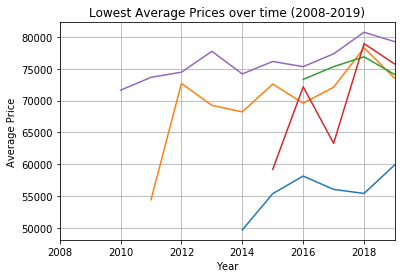

In [16]:
p1 = sales_ascending.iloc[0]
p2 = sales_ascending.iloc[1]
p3 = sales_ascending.iloc[2]
p4 = sales_ascending.iloc[3]
p5 = sales_ascending.iloc[4]
p1.plot(kind='line')
p2.plot(kind='line')
p3.plot(kind='line')
p4.plot(kind='line')
p5.plot(kind='line')
plt.title("Lowest Average Prices over time (2008-2019)")
plt.xlabel("Year")
plt.ylabel("Average Price")
plt.grid()


In [17]:
sales_descending = sales_yearly.sort_values(by=["2018"], ascending = False)
sales_descending.head()


,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
RegionName,,,,,,,,,,,,
"San Jose, CA",561960.0,436858.333333,503366.666667,485458.333333,532558.333333,633966.666667,699283.333333,774816.666667,825350.000000,896116.666667,1.078525e+06,1039980.0
"Santa Cruz, CA",524840.0,420600.000000,474566.666667,422475.000000,451075.000000,528216.666667,595933.333333,651250.000000,693916.666667,722850.000000,7.676500e+05,785100.0
"San Francisco, CA",468530.0,354641.666667,419525.000000,388250.000000,423941.666667,544416.666667,589975.000000,612275.000000,643358.333333,697975.000000,7.664500e+05,790060.0
"Napa, CA",434800.0,344041.666667,354766.666667,327008.333333,351483.333333,438891.666667,494950.000000,546183.333333,575208.333333,627225.000000,6.620455e+05,NaN
"Edwards, CO",NaN,629533.333333,618008.333333,483725.000000,436808.333333,502575.000000,545766.666667,567025.000000,565233.333333,592650.000000,6.483250e+05,673280.0


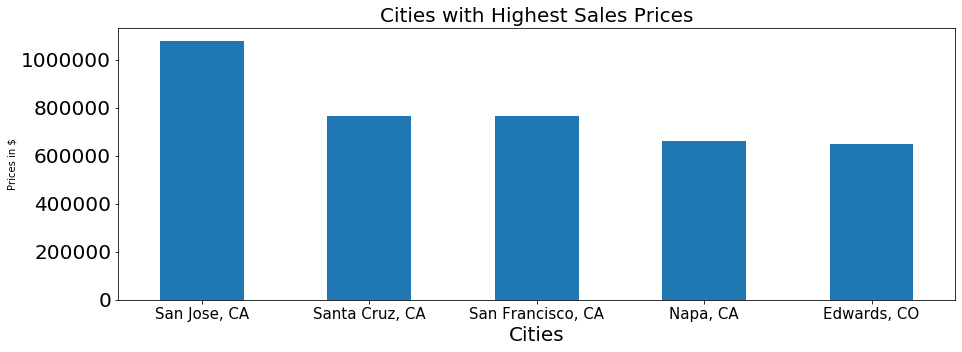

In [18]:
sales_2018 = sales_descending["2018"].iloc[0:5]
sales_2018.plot(kind="bar", label="Average Price", rot=0, figsize=(15,5))
plt.title("Cities with Highest Sales Prices", size = 20)
plt.xlabel("Cities", size=20)
plt.xticks(size = 15)
plt.yticks(size = 20)
plt.ylabel("Prices in $")
plt.savefig('highest_prices_2018.png')

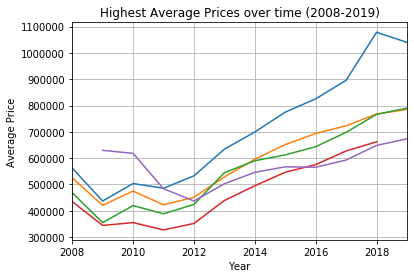

In [19]:
p1 = sales_descending.iloc[0]
p2 = sales_descending.iloc[1]
p3 = sales_descending.iloc[2]
p4 = sales_descending.iloc[3]
p5 = sales_descending.iloc[4]
p1.plot(kind='line')
p2.plot(kind='line')
p3.plot(kind='line')
p4.plot(kind='line')
p5.plot(kind='line')
plt.title("Highest Average Prices over time (2008-2019)")
plt.xlabel("Year")
plt.ylabel("Average Price")
plt.grid()

In [20]:
income_year.head()


,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
RegionName,,,,,,,,,,,,,,,,,,,,,
United States,16841.0025,18167.2025,19611.5400,20781.3000,21555.200,23170.9925,24449.1100,25805.9350,27043.5450,28281.0950,...,50221.0000,50045.9975,50502.0000,51371.0025,52250.0025,53657.0000,55774.9975,57617.0000,60336.0000,62625.593089
"New York, NY",18073.7975,19696.2475,21362.1975,23055.5250,24944.065,27005.8225,29217.5375,31489.8575,33992.2950,36369.2675,...,66171.4350,64760.8750,64416.8825,65122.7525,66159.1925,67198.4100,69235.5100,72002.9175,75368.3000,78389.312031
"Los Angeles-Long Beach-Anaheim, CA",18539.7275,20479.4475,21995.7925,23335.1075,24780.735,26625.6000,28591.0125,30675.3650,32885.0450,35181.0000,...,58492.4825,57289.2075,56870.7150,57598.3225,58884.0000,60642.4300,63003.0575,66163.0075,69992.3250,72709.618154
"Chicago, IL",20673.4750,21894.5650,22781.9075,23691.6200,24778.515,26147.0750,27722.7950,29321.9625,31386.9825,33566.0675,...,59043.0200,57699.7750,57876.3950,59030.9575,60474.2375,61771.6075,63590.4775,65858.7675,68403.0075,70710.499582
"Dallas-Fort Worth, TX",18740.0150,20765.4400,22576.5400,24216.3425,25960.770,27873.7725,29267.8425,29960.7550,30476.6600,31364.6150,...,55977.6700,55536.5525,56053.0675,57009.8050,58080.2375,59524.0875,61661.9225,64279.4325,67382.0350,69702.785174


In [21]:
income_ascending = income_year.sort_values(by=["2018"], ascending = True)
income_ascending.head()


,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
RegionName,,,,,,,,,,,,,,,,,,,,,
"Sebring, FL",11283.0000,12202.6500,12951.0950,13806.1475,14754.7325,16006.0825,17169.6075,18161.8625,19113.9200,20070.6275,...,33706.2775,33506.7325,33744.1075,33409.8100,33891.2050,33679.5325,34377.8550,34698.0400,35543.0025,36447.898142
"Las Cruces, NM",12362.0000,13462.5125,14622.2300,16050.0425,17249.2500,18298.4475,19018.9675,19679.0450,20230.0450,20946.4525,...,36002.8200,35741.5200,36115.4625,36337.2750,37077.1525,37596.0875,37868.8850,37533.0625,37143.9975,37784.492035
"Brownsville, TX",11731.0000,12925.6850,13791.8300,14096.6200,14038.7350,14145.3950,14384.6225,14668.4075,15069.6575,15963.5675,...,32134.2525,32370.5625,32388.6625,33075.3350,33087.9050,33999.7250,34810.3450,36198.3400,36975.0000,37859.945342
"McAllen, TX",11232.0000,12313.2475,13311.8275,13748.0775,13882.8250,14161.2075,14523.1175,14864.8800,15208.1075,15867.0075,...,32669.7750,32689.8225,33577.9075,33942.6775,34920.2225,35445.7075,35718.8125,36420.3375,37106.0000,37999.437148
"Shreveport, LA",15014.3475,16295.5650,17672.0850,18814.6100,19505.4100,20225.5475,20789.3400,20750.2625,20925.2375,21266.8725,...,40177.5625,40939.2600,41564.3600,42230.3575,42177.1575,42343.9150,41964.7000,40791.4950,38630.2700,38727.842426


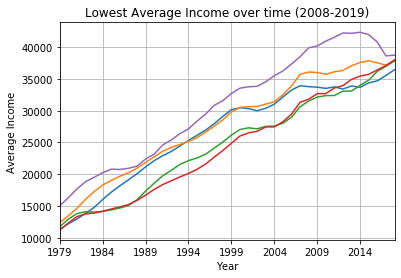

In [22]:
p1 = income_ascending.iloc[0]
p2 = income_ascending.iloc[1]
p3 = income_ascending.iloc[2]
p4 = income_ascending.iloc[3]
p5 = income_ascending.iloc[4]
p1.plot(kind='line')
p2.plot(kind='line')
p3.plot(kind='line')
p4.plot(kind='line')
p5.plot(kind='line')
plt.title("Lowest Average Income over time (2008-2019)")
plt.xlabel("Year")
plt.ylabel("Average Income")
plt.grid()

In [23]:
income_descending = income_year.sort_values(by=["2018"], ascending = False)
income_descending.head()


,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
RegionName,,,,,,,,,,,,,,,,,,,,,
"San Jose, CA",23261.2000,25707.7250,28063.4700,30617.6125,33571.1800,36275.7900,38314.2300,40027.1525,42364.0800,44978.0325,...,85506.8175,84145.8450,86230.1750,88762.0750,92916.4450,96665.2625,102835.0425,109832.3950,117474.1625,122849.712418
"San Francisco, CA",19998.7800,21885.0000,23612.1975,25259.3425,27060.5825,29093.9225,31252.8075,33366.3125,35705.1225,38072.5850,...,74566.1025,72941.8175,73306.6650,75507.6100,79256.0225,83788.8950,89473.7025,95635.6575,101712.9900,106353.967811
"Washington, DC",23205.6725,24521.0325,26132.2200,28316.6400,30277.0625,32603.3150,35188.8250,38409.4625,41703.2150,44202.2975,...,86970.4575,87098.8725,88025.0625,89413.1075,90192.0075,91545.3475,93443.4875,96268.6925,99668.9675,102638.537713
"Stamford, CT",22960.9975,25466.0000,27832.5175,29804.3575,32024.2575,34467.2200,37340.8525,40393.9025,44144.4100,47386.1700,...,82319.8425,79464.4600,79317.4825,81399.6200,83829.9175,85723.1025,88058.2550,89594.3500,91198.0000,94125.597273
"Napa, CA",18887.0025,20626.2525,21952.2925,23243.0175,24501.6025,26250.8875,28406.5350,30216.9575,32371.8925,34230.0750,...,67726.1000,66363.9175,65830.1875,67721.6025,71046.0875,73359.5675,74806.6500,79116.8175,86562.0000,91387.087042


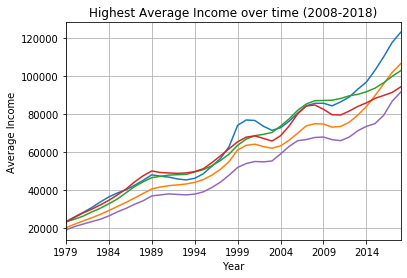

In [24]:
p1 = income_descending.iloc[0]
p2 = income_descending.iloc[1]
p3 = income_descending.iloc[2]
p4 = income_descending.iloc[3]
p5 = income_descending.iloc[4]
p1.plot(kind='line')
p2.plot(kind='line')
p3.plot(kind='line')
p4.plot(kind='line')
p5.plot(kind='line')
plt.title("Highest Average Income over time (2008-2018)")
plt.xlabel("Year")
plt.ylabel("Average Income")
plt.grid()


In [25]:
#Data Analysis
#Most affordable locations
afford_yearly.head()


,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
RegionName,,,,,,,,,,,,,,,,,,,,,
United States,2.932808,2.936556,2.855150,2.786501,2.790113,2.708238,2.697127,2.728673,2.771595,2.791939,...,3.197334,2.991031,2.935003,3.053122,3.146353,3.180931,3.276049,3.361331,3.492774,3.562198
"New York, NY",2.953441,3.011259,3.058400,2.964166,3.069803,3.324061,3.655481,4.161850,4.685548,4.734947,...,5.616979,5.358063,5.164212,5.218528,5.315592,5.310903,5.303486,5.384086,5.487218,5.530238
"Los Angeles-Long Beach-Anaheim, CA",4.161826,4.389481,4.482132,4.316740,4.158481,3.969679,3.876201,3.855721,4.049120,4.533854,...,7.269061,6.878451,6.850186,7.778812,8.224324,8.458849,8.598365,8.707101,8.911438,8.830346
"Chicago, IL",3.009770,2.843899,2.910671,2.692013,2.709267,2.695644,2.666801,2.709213,2.817584,2.909659,...,3.282909,2.931698,2.729187,2.801453,2.921469,2.970066,3.014218,3.069528,3.132213,3.145604
"Dallas-Fort Worth, TX",4.036234,4.118556,4.120932,4.050490,3.989567,3.939838,3.908683,3.931377,3.717364,3.387000,...,2.572933,2.482497,2.440464,2.483659,2.557624,2.702548,2.899811,3.092588,3.342236,3.475607


In [26]:
afford_sorted = afford_yearly.sort_values(by=["2018"], ascending = False)
afford_sorted.head()


,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
RegionName,,,,,,,,,,,,,,,,,,,,,
"San Jose, CA",3.836997,4.237485,4.336052,3.954784,3.710635,3.636763,3.710379,3.807899,3.922615,4.380039,...,6.933811,6.428210,6.742961,7.620874,8.092942,8.644077,8.655017,9.007787,10.216902,9.693761
"Santa Cruz, CA",4.832513,5.231518,5.376499,5.285704,4.757358,4.565654,4.489113,4.549393,4.660420,5.006907,...,8.203936,7.393453,7.323015,8.241605,9.197566,9.509877,9.719124,9.882413,10.018380,9.770666
"San Francisco, CA",4.478091,4.915379,4.930258,4.601616,4.449631,4.300130,4.283674,4.358175,4.554528,4.948424,...,7.175494,6.546280,6.627813,7.719817,8.102294,8.513180,8.505443,8.576222,8.936186,8.788810
"Los Angeles-Long Beach-Anaheim, CA",4.161826,4.389481,4.482132,4.316740,4.158481,3.969679,3.876201,3.855721,4.049120,4.533854,...,7.269061,6.878451,6.850186,7.778812,8.224324,8.458849,8.598365,8.707101,8.911438,8.830346
"Urban Honolulu, HI",3.679651,4.150246,3.231590,3.584019,3.608588,3.587492,3.581378,3.542266,3.587710,3.905139,...,6.823872,6.647113,6.704215,6.922594,7.254872,7.391931,7.768195,8.045750,8.205504,8.074293


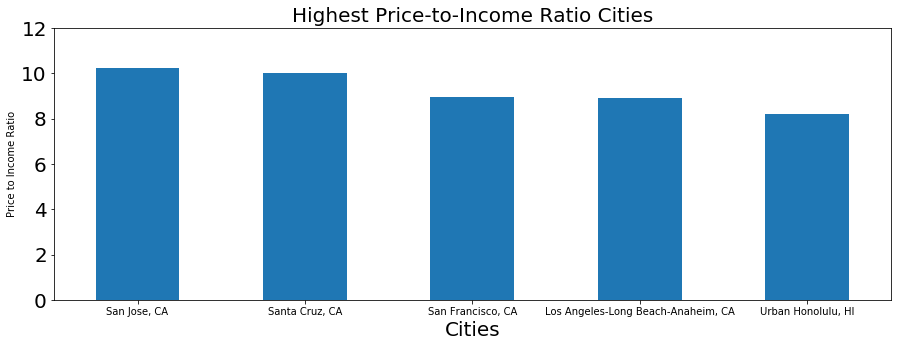

In [27]:
afford_2018 = afford_sorted["2018"].iloc[0:5]
afford_2018.plot(kind="bar", label="Affordability", rot=0, figsize=(15,5))
plt.title("Highest Price-to-Income Ratio Cities", size = 20)
plt.ylim(0, 12)
plt.xlabel("Cities", size=20)
plt.xticks(size = 10)
plt.yticks(size = 20)
plt.ylabel("Price to Income Ratio")
plt.savefig('price_income_ratio_2018.png')

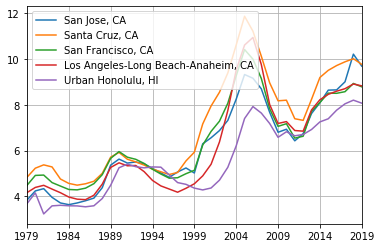

In [28]:
#Highest Price to Income Ratios
# x_axis = afford_sorted.columns

Santa_Cruz = afford_sorted.iloc[0]
Santa_Jose = afford_sorted.iloc[1]
Los_Angeles = afford_sorted.iloc[2]
San_Francisco = afford_sorted.iloc[3]
San_Luis_Obispo = afford_sorted.iloc[4]
Santa_Cruz.plot(kind='line')
Santa_Jose.plot(kind='line')
Los_Angeles.plot(kind='line')
San_Francisco.plot(kind='line')
San_Luis_Obispo.plot(kind='line')
plt.legend()
plt.grid()


In [33]:
# df.loc[df['column_name'] == some_value]
afford_optimal = afford_yearly.loc[afford_yearly["2018"] < 3.493]
afford_optimal_sorted= afford_optimal.sort_values(by=["2018"], ascending = False)
afford_optimal_sorted.head(10)

,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
RegionName,,,,,,,,,,,,,,,,,,,,,
United States,2.932808,2.936556,2.855150,2.786501,2.790113,2.708238,2.697127,2.728673,2.771595,2.791939,...,3.197334,2.991031,2.935003,3.053122,3.146353,3.180931,3.276049,3.361331,3.492774,3.562198
"Lawrence, KS",NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.767144,2.798641,2.745051,...,3.883505,3.689024,3.466271,3.448128,3.408427,3.322428,3.294610,3.392764,3.475101,3.593890
"Dover, DE",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.876636,2.912569,...,3.581727,3.318782,3.101145,3.037282,3.118961,3.229079,3.285019,3.328030,3.460593,3.484631
"Racine, WI",NaN,NaN,NaN,NaN,2.662459,2.506915,2.440431,2.427070,2.372003,2.335388,...,3.389146,3.115990,3.066363,3.107563,3.056899,3.150840,3.158425,3.286165,3.458812,3.543689
"Raleigh, NC",3.765198,3.728102,3.732349,3.595239,3.413874,3.449820,3.524895,3.571595,3.499268,3.406346,...,3.306143,3.152225,3.078119,3.147967,3.191894,3.186079,3.234392,3.339124,3.442244,3.523838
"Virginia Beach, VA",2.830401,2.904702,2.782909,2.641339,2.712677,2.794491,2.780549,2.796253,2.840623,2.841232,...,3.796059,3.521552,3.467331,3.477872,3.466590,3.412415,3.397438,3.428245,3.429763,3.440887
"Hanford, CA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.864769,2.735413,...,3.120539,2.791821,2.744002,3.109759,3.333992,3.360263,3.356295,3.389572,3.426929,3.482622
"Manchester, NH",NaN,NaN,2.590498,2.417744,2.397111,2.489687,2.753231,3.106372,3.276874,3.263700,...,3.265759,3.004397,2.987820,3.066637,3.080910,3.103121,3.176239,3.314169,3.423670,3.496517
"Lakeland, FL",NaN,NaN,NaN,NaN,2.893024,2.653209,2.599593,2.529397,2.453559,2.338586,...,2.516959,2.200665,2.178653,2.374210,2.646147,2.841020,2.976717,3.229632,3.408772,3.497918


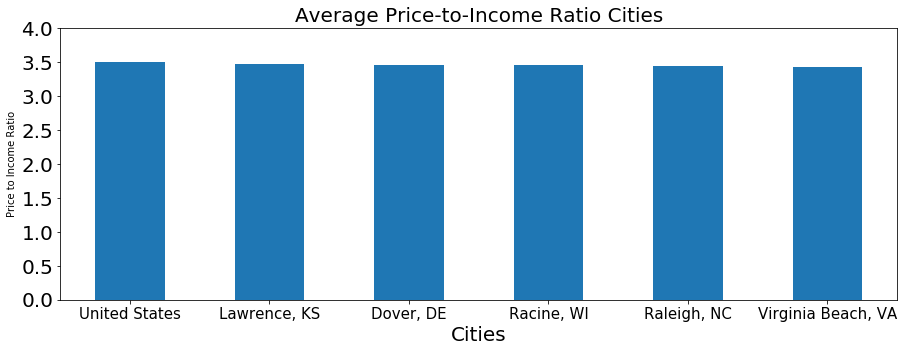

In [38]:
afford_optimal_2018 = afford_optimal_sorted["2018"].iloc[0:6]
afford_optimal_2018.plot(kind="bar", label="Affordability", rot=0, figsize=(15,5))
plt.title("Average Price-to-Income Ratio Cities", size = 20)
plt.xlabel("Cities", size = 20)
plt.ylabel("Price to Income Ratio")
plt.xticks(size = 15)
plt.yticks(size = 20)
plt.ylim(0, 4)
plt.savefig('price_income_ratio_average.png')

In [45]:
income_year.loc["Virginia Beach, VA", "2018"]

66126.01412441951

In [31]:
afford_lowest = afford_yearly.sort_values(by=["2018"], ascending = True)
afford_lowest.head()


,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
RegionName,,,,,,,,,,,,,,,,,,,,,
"Danville, IL",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.074353,0.056573,0.053786,0.061855,0.056334,0.056360,0.057061,0.060626,0.063686,0.061618
"Decatur, IL",NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.126929,0.136251,0.132104,...,0.129146,0.093167,0.075552,0.075652,0.071309,0.068982,0.063297,0.061301,0.069278,0.064480
"Sumter, SC",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.078197,0.074379,0.065395,0.069524,0.065709,0.059557,0.057788,0.058357,0.073245,0.074797
"Johnstown, PA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.109324,0.098772,0.082376,0.079164,0.076637,0.073752,0.071124,0.072513,0.075536,0.066979
"Lawton, OK",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.100543,0.094927,0.084052,0.087982,0.079874,0.069809,0.067648,0.073504,0.081431,0.085930


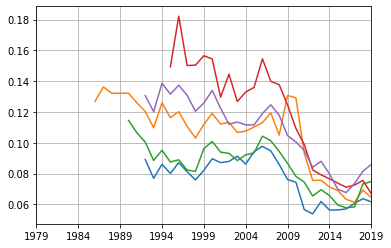

In [32]:
Danville = afford_lowest.iloc[0]
Decatur = afford_lowest.iloc[1]
Johnstown = afford_lowest.iloc[2]
Sumter = afford_lowest.iloc[3]
Wheeling = afford_lowest.iloc[4]
Danville.plot(kind='line')
Decatur.plot(kind='line')
Johnstown.plot(kind='line')
Sumter.plot(kind='line')
Wheeling.plot(kind='line')
plt.grid()